In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import math
from math import sqrt
from tensorflow.keras.models import Sequential  # Import from tensorflow.keras
from tensorflow.keras.layers import Dense, Dropout, Activation # Import layers directly from tensorflow.keras

In [6]:
def get_stock_data(normalized=0):
    url = "/content/META_AUG_2023 to AUG_2024.csv"
    col_names = ['Date','Open','High','Low','Close','Volume','Adj Close']
    stocks = pd.read_csv(url, header=0, names=col_names)
    df = pd.DataFrame(stocks)
    # Split the 'Date' column and create new columns
    df[['Year', 'Month', 'Day']] = df['Date'].str.split('-', expand=True)
    df["Volume"] = df["Volume"] / 10000
    return df

In [7]:
df = get_stock_data(0)
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close,Year,Month,Day
0,2023-08-01,317.540009,324.140015,314.660004,322.709991,0.032205,22817900,2023,08,01
1,2023-08-02,318.000000,318.390015,310.649994,314.309998,0.031367,20461100,2023,08,02
2,2023-08-03,309.929993,315.950012,309.929993,313.190002,0.031255,15180200,2023,08,03
3,2023-08-04,314.959991,318.410004,310.200012,310.730011,0.031009,17600200,2023,08,04
4,2023-08-07,313.230011,317.070007,310.459991,316.559998,0.031591,16236500,2023,08,07


In [8]:
df.drop(df.columns[[0,3,6, 7,8,9]], axis=1, inplace=True)
df.head()

,Open,High,Close,Volume
0,317.540009,324.140015,322.709991,0.032205
1,318.000000,318.390015,314.309998,0.031367
2,309.929993,315.950012,313.190002,0.031255
3,314.959991,318.410004,310.730011,0.031009
4,313.230011,317.070007,316.559998,0.031591


Normalizing and removing the null data points

In [9]:
df['Open'] = df['Open']/100
df['High'] = df['High']/100
df['Volume'] = df['Volume']*100
df['Close'] = df['Close']/100
print(df)
nan_value_index = []
High = df.High.isnull()
for i in range(0, len(High)):
    if High[i] == 1:
        nan_value_index.append(i)
        df['High'][i] = 0
Open = df.Open.isnull()
for i in range(0, len(Open)):
    if Open[i] == 1:
        nan_value_index.append(i)
        df['Open'][i] = 0
Volume = df.Volume.isnull()
for i in range(0, len(Volume)):
    if Volume[i] == 1:
        nan_value_index.append(i)
        df['Volume'][i] = 0
Close = df.Close.isnull()
for i in range(0, len(Close)):
    if Close[i] == 1:
        nan_value_index.append(i)
        df['Close'][i] = 0

       Open    High   Close    Volume
0    3.1754  3.2414  3.2271  3.220482
1    3.1800  3.1839  3.1431  3.136654
2    3.0993  3.1595  3.1319  3.125478
3    3.1496  3.1841  3.1073  3.100928
4    3.1323  3.1707  3.1656  3.159108
..      ...     ...     ...       ...
247  4.6326  4.6355  4.5341  4.534100
248  4.6420  4.6977  4.6570  4.657000
249  4.6988  4.7396  4.6571  4.657100
250  4.6700  4.7273  4.6319  4.631900
251  4.7102  4.7650  4.7483  4.748300

[252 rows x 4 columns]


In [10]:
X = df[['High','Open', 'Volume']]
Y = df[['Close']]
factor = 0.80
length = X.shape[0]
total_for_train = int(length*factor)
X_train = X[:total_for_train]
Y_train = Y[:total_for_train]
X_test = X[total_for_train:]
Y_test = Y[total_for_train:]

In [11]:
print("X_train", X_train.shape)
print("y_train", Y_train.shape)
print("X_test", X_test.shape)
print("y_test", Y_test.shape)

X_train (201, 3)
y_train (201, 1)
X_test (51, 3)
y_test (51, 1)


Compiling and training the neural network model

In [12]:
classifier = Sequential()
classifier.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 3))
classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'linear'))
classifier.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = [])
classifier.fit(X_train, Y_train, batch_size = 128, epochs = 10, validation_split=0.05)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 194ms/step - loss: 14.8624 - val_loss: 21.8573
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 14.9864 - val_loss: 21.8244
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 14.9365 - val_loss: 21.7888
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 14.9572 - val_loss: 21.7506
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 14.8483 - val_loss: 21.7089
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 14.9735 - val_loss: 21.6630
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 14.7065 - val_loss: 21.6122
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 14.9311 - val_loss: 21.5559
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 14.7324 - val_loss: 21.4935
Epoch 10/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 14.6728 - val_loss: 21.4241


Predicted Values

In [13]:
predictions = classifier.predict(X_test)
print(predictions[:10])


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
[[0.05150101]
 [0.05141035]
 [0.05121765]
 [0.05134558]
 [0.05140927]
 [0.05166834]
 [0.05191213]
 [0.05172171]
 [0.05138596]
 [0.05122682]]


Calculating the error in the trained Neural Network model

In [14]:
trainScore = classifier.evaluate(X_train, Y_train, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = classifier.evaluate(X_test, Y_test, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 14.99 MSE (3.87 RMSE)
Test Score: 23.65 MSE (4.86 RMSE)


Predictions vs Real results

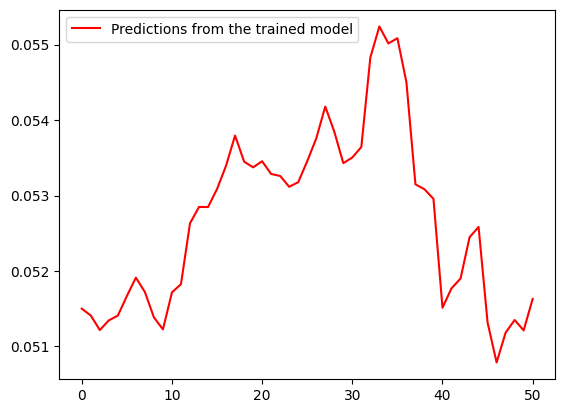

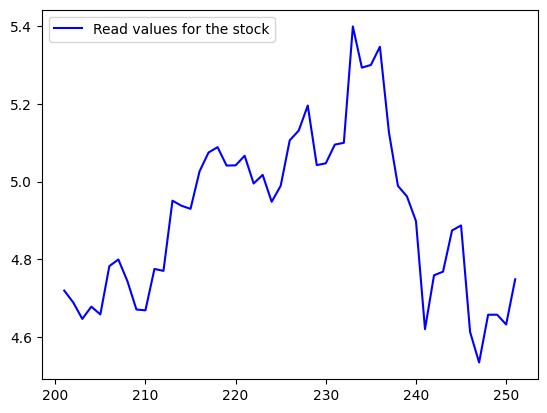

In [15]:
import matplotlib.pyplot as plt
plt.plot(predictions,color='red', label='Predictions from the trained model')
plt.legend(loc='upper left')
plt.show()
plt.plot(Y_test,color='blue', label='Read values for the stock')
plt.legend(loc='upper left')
plt.show()